In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker
import matplotlib.cm as cm
import scipy.optimize as op
import plasmapy
from scipy import special as sp
from scipy import integrate
from tqdm import tqdm
import numba as nb
import math
%config InlineBackend.figure_format = 'svg'

In [4]:
me = 1
Te = 1
mi = 100
Ti = 1

L = 40.0
vmax = 5 # 速度最大值
nx = 500
nv = 500
dx = L/(nx-1)
dv = 2*vmax/(nv-1)
x = np.linspace(0, L, num=nx, endpoint=True)
v = np.linspace(-vmax, vmax, num=nv, endpoint=True)
V,X=np.meshgrid(v,x)

dt = 0.05
max_steps = 1000
data_steps = 1000
data_num = int(max_steps/data_steps)+1

path = 'E:/代码/vlasov-es1d/data/'
print(data_num)
print('real time = ', max_steps*dt)
print('dx',dx)
print('dx0',x[1]-x[0])

2
real time =  50.0
dx 0.08016032064128256
dx0 0.08016032064128256


In [5]:
dataet = np.loadtxt(os.path.join(path,"tot_energy"))[0:max_steps]
dataep = np.loadtxt(os.path.join(path,"pot_energy"))[0:max_steps]
dataek = np.loadtxt(os.path.join(path,"kin_energy"))[0:max_steps]

t = np.linspace(0, max_steps, max_steps)

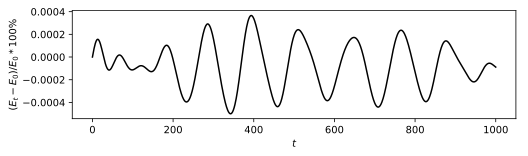

In [6]:
fig = plt.figure(figsize=(8, 2))

# plt.plot(t, (dataek-dataek[0])/dataek[0]*100, color='black')
plt.plot(t, (dataet-dataet[0])/dataet[0]*100, color='black')
plt.ylabel(r'$(E_t-E_0)/E_0*100\%$')
plt.xlabel(r'$t$')
plt.show()

In [7]:
progesses = np.arange(0,data_num,1)

fe = []
phi = []
fi = []

for progess in tqdm(progesses):
    fe_temp = np.loadtxt(os.path.join(path,"fe"+str(progess)))
    fe.append(fe_temp)
    fi_temp = np.loadtxt(os.path.join(path,"fi"+str(progess)))
    fi.append(fi_temp)
    phi_temp = np.loadtxt(os.path.join(path,"phi"+str(progess)))
    phi.append(phi_temp)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.80it/s]


In [8]:
# test_frame = data_num-1
test_frame = 1
fex0 = np.sum(fe[0],axis=1)*dv
fev0 = np.sum(fe[0],axis=0)*dx/L
fex = np.sum(fe[test_frame],axis=1)*dv
fev = np.sum(fe[test_frame],axis=0)*dx/L
fix0 = np.sum(fi[0],axis=1)*dv
fiv0 = np.sum(fi[0],axis=0)*dx/L
fix = np.sum(fi[test_frame],axis=1)*dv
fiv = np.sum(fi[test_frame],axis=0)*dx/L

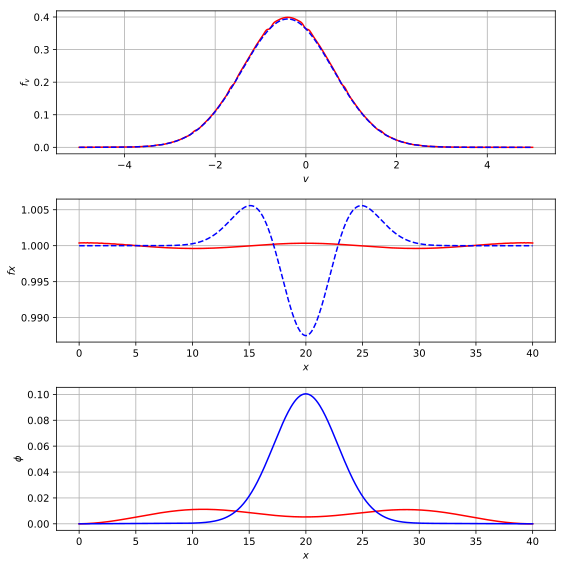

In [9]:
fig = plt.figure(figsize=(8, 8))
xzero = int(nx/2)

ax1 = plt.subplot(311)
ax1.plot(v, fe[test_frame][xzero,:], color='red')
ax1.plot(v, fe[0][xzero,:],'--', color='blue')
ax1.set_xlabel(r'$v$')
ax1.set_ylabel(r'$f_{v}$')
# ax1.set_yscale('log')
ax1.grid()

ax2 = plt.subplot(312)
ax2.plot(x, fex, color='red')
ax2.plot(x, fex0,'--', color='blue')
ax2.set_xlabel(r'$v$')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$fx$')
ax2.grid()

ax3 = plt.subplot(313)
ax3.plot(x, phi[test_frame], color='red')
ax3.plot(x, phi[0],'-', color='blue')
# ax5.plot(x, phi_sc,'--', color='black')
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$\phi$')
ax3.grid()

plt.tight_layout()
plt.show()

In [10]:
Ze = fe[test_frame]
Ze[np.where(Ze<=0)]=0
Zi = fi[test_frame]
Zi[np.where(Zi<=0)]=0
lve_idx = np.linspace(-2,0,num=30)
lve = 10**lve_idx
lvi_idx = np.linspace(-40,1,num=20)
lvi = 10**lvi_idx
vle = 1.5
vli = 1.5

fig = plt.figure(figsize=(8, 10))
ax1 = plt.subplot(211)
ax1cm = ax1.contourf(X, V, fe[0], levels=lve,norm=colors.LogNorm(vmin=lve.min(),vmax=lve.max()),cmap=cm.plasma)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$v$')
# ax1.set_xlim(40,60)
ax1.set_ylim(-vle,vle)
ax1.set_title(r'$t=0$')

ax2 = plt.subplot(212)
ax2cm = ax2.contourf(X, V, Ze, levels=lve,norm=colors.LogNorm(vmin=lve.min(),vmax=lve.max()),cmap=cm.plasma)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$v$')
ax2.set_ylim(-vle,vle)
# ax2.grid()
ax2.set_title(r'$t=$'+str(test_frame*data_steps*dt))

plt.show()

c:\users\rguo\appdata\local\programs\python\python37\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
